In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.linear_model import LinearRegression

In [2]:
# img = cv2.imread('3660.20-3660.95_01011.bmp')
img = cv2.imread(r"C:\Users\abely\OneDrive\Desktop\tomography\tom_snimki\00995.png")
# img = cv2.imread('photo_2023-11-29_12-35-34.jpg')

In [3]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
line = np.array(gray_img[0,:], dtype=int)
line

array([22, 19, 18, 22, 27, 31, 32, 29, 24, 20, 20, 24, 28, 29, 24, 21, 21,
       24, 28, 29, 27, 23, 21, 22, 26, 29, 30, 28, 27, 27, 27, 26, 21, 18,
       21, 26, 27, 28, 28, 26, 23, 23, 24, 26, 26, 27, 28, 28, 28, 26, 22,
       23, 26, 26, 24, 23, 29, 34, 30, 23, 20, 22, 24, 24, 23, 25, 28, 26,
       23, 24, 27, 30, 27, 23, 23, 25, 27, 27, 25, 23, 23, 22, 22, 26, 27,
       28, 28, 26, 23, 24, 28, 29, 27, 26, 24, 22, 23, 22, 22, 26, 31, 32,
       27, 24, 23, 24, 24, 24, 24, 25, 27, 24, 22, 23, 28, 29, 26, 23, 24,
       26, 27, 28, 29, 28, 28, 24, 21, 20, 21, 25, 29, 31, 29, 26, 22, 22,
       24, 25, 24, 26, 28, 27, 26, 23, 22, 23, 26, 26, 25, 26, 27, 28, 28,
       27, 26, 26, 24, 24, 25, 25, 26, 27, 27, 26, 27, 28, 26, 23, 21, 22,
       27, 28, 26, 27, 28, 25, 20, 20, 23, 29, 30, 26, 23, 26, 27, 27, 25,
       24, 26, 28, 26, 22, 24, 26, 27, 29, 28, 25, 23, 24, 23, 21, 21, 26,
       33, 36, 27, 18, 18, 26, 30, 28, 23, 21, 23, 27, 30, 30, 26, 23, 23,
       27, 29, 28, 23, 20

In [4]:
diffs = line[1:] - line[:-1]
diffs

array([-3, -1,  4,  5,  4,  1, -3, -5, -4,  0,  4,  4,  1, -5, -3,  0,  3,
        4,  1, -2, -4, -2,  1,  4,  3,  1, -2, -1,  0,  0, -1, -5, -3,  3,
        5,  1,  1,  0, -2, -3,  0,  1,  2,  0,  1,  1,  0,  0, -2, -4,  1,
        3,  0, -2, -1,  6,  5, -4, -7, -3,  2,  2,  0, -1,  2,  3, -2, -3,
        1,  3,  3, -3, -4,  0,  2,  2,  0, -2, -2,  0, -1,  0,  4,  1,  1,
        0, -2, -3,  1,  4,  1, -2, -1, -2, -2,  1, -1,  0,  4,  5,  1, -5,
       -3, -1,  1,  0,  0,  0,  1,  2, -3, -2,  1,  5,  1, -3, -3,  1,  2,
        1,  1,  1, -1,  0, -4, -3, -1,  1,  4,  4,  2, -2, -3, -4,  0,  2,
        1, -1,  2,  2, -1, -1, -3, -1,  1,  3,  0, -1,  1,  1,  1,  0, -1,
       -1,  0, -2,  0,  1,  0,  1,  1,  0, -1,  1,  1, -2, -3, -2,  1,  5,
        1, -2,  1,  1, -3, -5,  0,  3,  6,  1, -4, -3,  3,  1,  0, -2, -1,
        2,  2, -2, -4,  2,  2,  1,  2, -1, -3, -2,  1, -1, -2,  0,  5,  7,
        3, -9, -9,  0,  8,  4, -2, -5, -2,  2,  4,  3,  0, -4, -3,  0,  4,
        2, -1, -5, -3,  0

In [5]:
diffs[455]

4

In [6]:
len(diffs)

511

In [7]:
np.argmax(diffs > 40) + 1

1

In [8]:
len(diffs) - 1 - np.argmax([diffs[::-1] < -40])

510

In [9]:
line[np.argmax(diffs > 40) + 1], line[len(diffs) - 1 - np.argmax([diffs[::-1] < -40])]

(19, 23)

In [10]:
not None

True

In [11]:
# 1 вариант нахождения положения и радуса круга - непосредственно по циклу
t = 40 # порог
diameter = np.zeros(gray_img.shape[0])
max_diameter = 0
center = 0, 0
for i in range(gray_img.shape[0]):
    line = np.array(gray_img[i,:], dtype=int)
    diffs = line[1:] - line[:-1]
    # start, end = np.argmax(diffs > t) + 1, len(diffs) - 1 - np.argmax([diffs[::-1] < -t])
    start, end = None, None
    for j in range(gray_img.shape[1] - 1):
        if not start and diffs[j] > t:
            start = j
        if diffs[j] < -t:
            end = j
    if start and end:
        diameter[i] = end - start
    # print(start, end)
    if diameter[i] > max_diameter:
        max_diameter = diameter[i]
        center = i, (start + end) // 2
    # if diameter[i] < max_diameter:
    #     break
# diameter
radius = max_diameter / 2
print(f'center={center}; diameter={max_diameter}; radius={radius}')

center=(264, 245); diameter=398.0; radius=199.0


In [12]:
# 2вариант нахождения положения и радуса круга - для очень однородных картин без "выколотостей"
mask_circle = gray_img > 100
circle_from_mask = np.array(mask_circle).astype(int)
circle_from_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

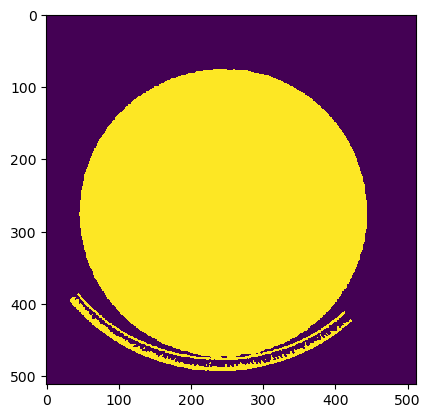

In [13]:
plt.imshow(circle_from_mask, interpolation='nearest')
plt.show()

In [14]:
diameter = np.zeros(circle_from_mask.shape[0])
max_diameter = 0
for i in range(circle_from_mask.shape[0]):
    line = circle_from_mask[i,:]
    start, end = 0, 0
    for j in range(circle_from_mask.shape[1] - 1):
        if line[j+1] - line[j] > 0:
            start = j+1
        if line[j] - line[j+1] > 0:
            end = j+1
    diameter[i] = end - start
    if diameter[i] > max_diameter:
        max_diameter = diameter[i]
        center = i, (start + end) // 2
    if diameter[i] < max_diameter:
        break
# diameter
radius = max_diameter / 2
print(f'center={center}; diameter={max_diameter}; radius={radius}')

center=(274, 245); diameter=398.0; radius=199.0


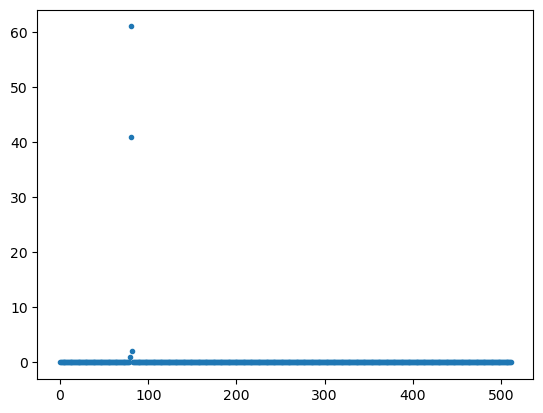

In [130]:
plt.plot(diameter,'.')

In [15]:
cv2.imshow("win_name", circle_from_mask)

error: OpenCV(4.8.1) D:/a/opencv-python/opencv-python/opencv/modules/highgui/src/precomp.hpp:155: error: (-215:Assertion failed) src_depth != CV_16F && src_depth != CV_32S in function 'convertToShow'


In [16]:
def get_ab_linreg(x, y):
    n = len(x)
    sumxy = np.sum(x * y)
    sumx = np.sum(x)
    sumy = np.sum(y)
    sumx2 = np.sum(x**2)
    a = (n*sumxy - sumx*sumy)/(n*sumx2 - sumx**2)
    b = (sumy - a * sumx) / n
    return a, b

In [17]:
def get_array_of_ab(X, Y, window_size = 30):
    N = len(X)
    k_windows = N - window_size + 1
    array_ab = np.zeros((2, k_windows))
    for i in range(k_windows):
        x, y = X[i:i+window_size], Y[i:i+window_size]
        array_ab[:,i] = get_ab_linreg(x, y)
    return array_ab

In [18]:
def cummean(X, Y):
    N = len(Y)
    meansY = np.zeros(len(Y))
    for i in range(N):
        meansY[i] = np.mean(Y[:i])
    return meansY

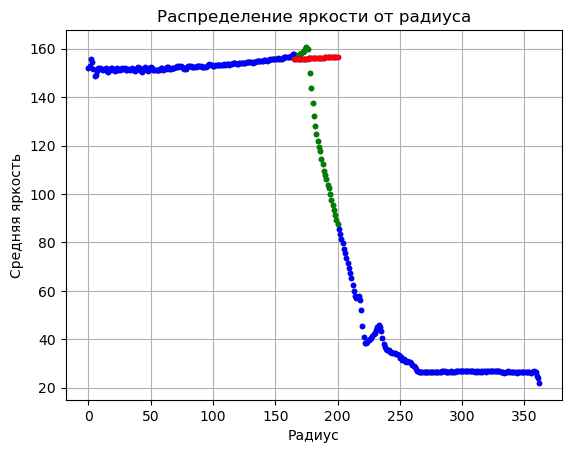

In [19]:
# Рассчитываем расстояние каждого пикселя до центра изображенияh,
w, h = img.shape[:2]
center = (w // 2, h // 2)
y, x = np.indices((h, w))
radii = np.sqrt((x - center[0])**2 + (y - center[1])**2)
# Рассчитываем среднюю яркость для каждого радиуса
unique_radii = np.unique(radii.astype(int))
# brightness = []
brightness = np.zeros(unique_radii.shape)
for i, radius in enumerate(unique_radii):
    mask = radii.astype(int) == radius
    average_brightness = np.mean(img[mask])
    # brightness.append(average_brightness)
    brightness[i] = average_brightness
# Построение графика распределения яркости от радиуса
plt.plot(unique_radii, brightness, '.', color='black')
plt.xlabel('Радиус')
plt.ylabel('Средняя яркость')
plt.title('Распределение яркости от радиуса')

ind_start = 165
ind_end = 201
plt.plot(unique_radii[ind_start:ind_end], brightness[ind_start:ind_end], 'g.')
X_train = unique_radii[0:ind_start].reshape((-1,1))
y_train = brightness[0:ind_start]
model = LinearRegression().fit(X_train, y_train)
x_pred = unique_radii[ind_start:ind_end].reshape((-1,1))
y_pred = model.predict(x_pred)

y_tail = brightness[ind_end:]
y_final = np.hstack((y_train, y_pred, y_tail))

plt.plot(unique_radii, y_final, 'b.')
plt.plot(x_pred, y_pred, 'r.')

plt.grid()
plt.show()

In [20]:
start_idx = 30
window_size = 50
array_ab = get_array_of_ab(unique_radii[start_idx:], brightness[start_idx:], window_size = window_size)

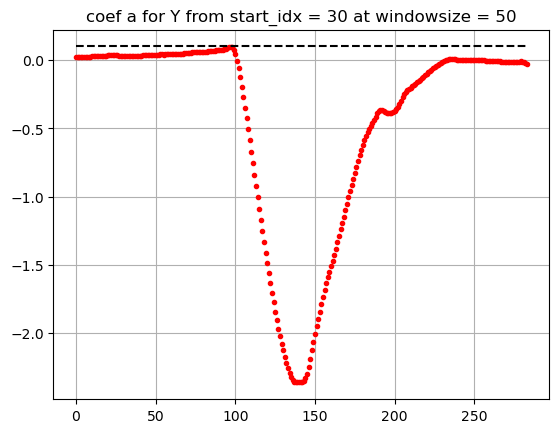

In [21]:
plt.grid()
plt.plot(array_ab[0,:], '.r')
# plt.plot(array_ab[1,:]/100, '.b')

plt.plot(0.1*np.ones(np.shape(array_ab[0,:])), '--k')
plt.title(f'coef a for Y from start_idx = {start_idx} at windowsize = {window_size}');

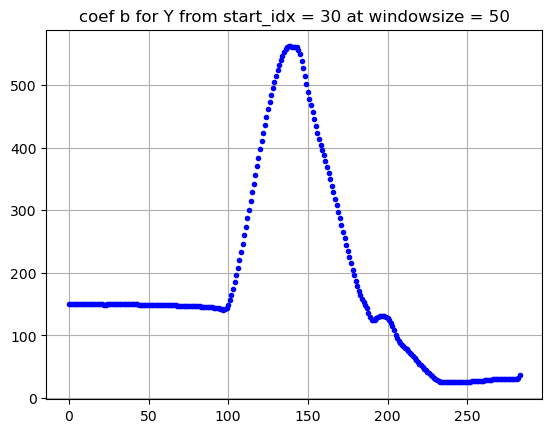

In [22]:
plt.grid()
plt.plot(array_ab[1,:], '.b')
plt.title(f'coef b for Y from start_idx = {start_idx} at windowsize = {window_size}');

In [23]:
acoefs = array_ab[0,:]

In [24]:
np.argmax(acoefs < 0)

101

In [25]:
start_wrap = start_idx + np.argmax(acoefs >= 0.1)
end_wrap = start_idx + np.argmax(acoefs < 0)
print(start_wrap, end_wrap)
mean_Y_before_wrap = np.mean(brightness[:start_wrap])
print(mean_Y_before_wrap)

30 131
151.62059959493152


In [26]:
print(f'start_wrap={start_wrap}, end_wrap={end_wrap}')

start_wrap=30, end_wrap=131


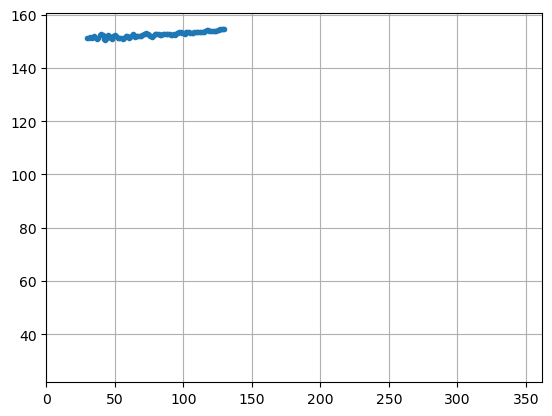

In [27]:
plt.plot(unique_radii[start_wrap:end_wrap], brightness[start_wrap:end_wrap], '.')
plt.xlim([min(unique_radii), max(unique_radii)])
plt.ylim([min(brightness), max(brightness)])
plt.grid()
plt.show()

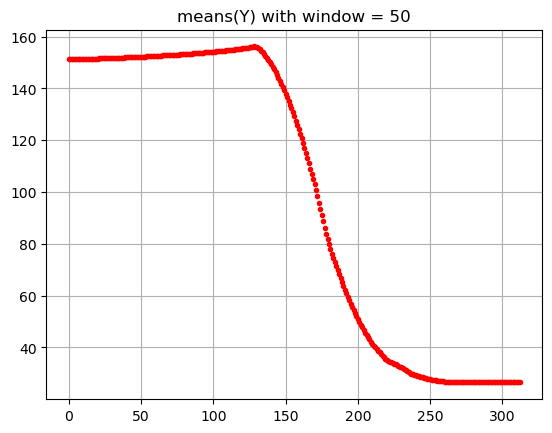

In [28]:
window_for_mean = 50
meansY = np.array([brightness[i:i+window_for_mean] for i in range(len(unique_radii)-window_for_mean)])
meansY = np.mean(meansY, axis=-1)
# meansY.shape # = len(unique_radii) - window_for_mean

plt.grid()
plt.plot(unique_radii[0:len(unique_radii) - window_for_mean] ,meansY, '.r')
plt.title(f'means(Y) with window = {window_for_mean}');

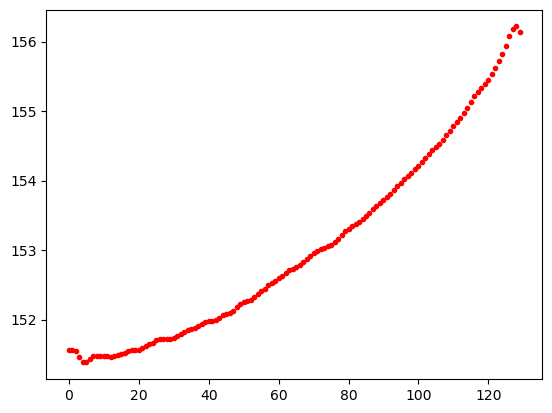

In [29]:
plt.plot(unique_radii[0:130] ,meansY[0:130], '.r')

In [30]:
start_idx = 60
cummeansY = cummean(unique_radii[start_idx:], brightness[start_idx:])

C:\Users\abely\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\abely\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


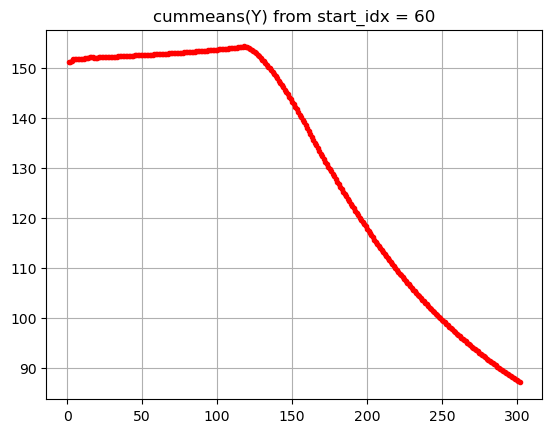

In [31]:
plt.grid()
plt.plot(cummeansY, '.--r')
plt.title(f'cummeans(Y) from start_idx = {start_idx}');

In [32]:
np.argmax(cummeansY>=119.0)

1

In [33]:
window_size = 30
ab_coefs_cummeansY = get_array_of_ab(np.arange(len(cummeansY)), cummeansY, window_size = window_size)


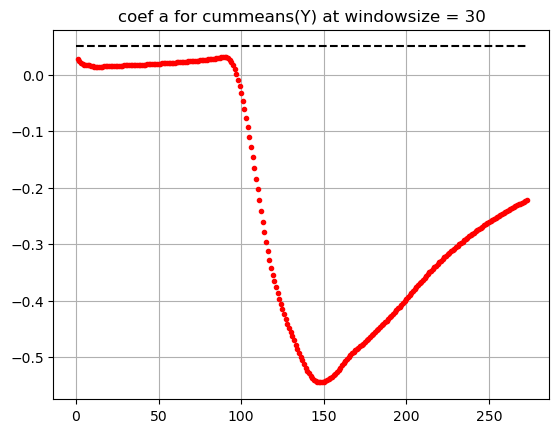

In [34]:
plt.grid()
plt.plot(ab_coefs_cummeansY[0,:], '.r')
# plt.plot(ab_coefs_meansY[1,:]/100, '.b')

plt.plot(0.05*np.ones(np.shape(ab_coefs_cummeansY[0,:])), '--k')
plt.title(f'coef a for cummeans(Y) at windowsize = {window_size}');

In [35]:
y_final[170:]

array([155.73396955, 155.76495668, 155.79594381, 155.82693094,
       155.85791807, 155.8889052 , 155.91989233, 155.95087946,
       155.98186659, 156.01285372, 156.04384086, 156.07482799,
       156.10581512, 156.13680225, 156.16778938, 156.19877651,
       156.22976364, 156.26075077, 156.2917379 , 156.32272503,
       156.35371217, 156.3846993 , 156.41568643, 156.44667356,
       156.47766069, 156.50864782, 156.53963495, 156.57062208,
       156.60160921, 156.63259634, 156.66358348,  85.50566343,
        83.66451613,  81.26355422,  79.72397476,  77.1530303 ,
        75.71835443,  73.66334356,  71.49244713,  69.5797546 ,
        67.32698171,  65.14391691,  62.3742515 ,  59.93973214,
        57.76116071,  56.89879154,  57.52095376,  57.68313953,
        56.06710914,  51.93352601,  45.69797688,  40.86174785,
        38.55969101,  38.42296512,  39.00628492,  39.66618911,
        40.08356742,  40.60240113,  41.53856749,  42.02473262,
        42.74071429,  43.65      ,  45.04132231,  45.85

In [36]:
y_train.shape

(165,)

In [69]:
y_pred.shape

(35,)

In [75]:
y_final.shape

(363,)

In [84]:
unique_radii.shape

(363,)